In [1]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



In [2]:
# DataSet loading
heart_df = pd.read_csv("heart.csv")

# preview the data
heart_df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Data Info
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
# Drop unnecessary columns, these columns won't be useful in analysis and prediction
heart_df = heart_df.drop(['oldpeak','restecg', ], axis=1)
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,thalach,exang,slope,ca,thal,target
0,63,1,3,145,233,1,150,0,0,0,1,1
1,37,1,2,130,250,0,187,0,0,0,2,1
2,41,0,1,130,204,0,172,0,2,0,2,1
3,56,1,1,120,236,0,178,0,2,0,2,1
4,57,0,0,120,354,0,163,1,2,0,2,1


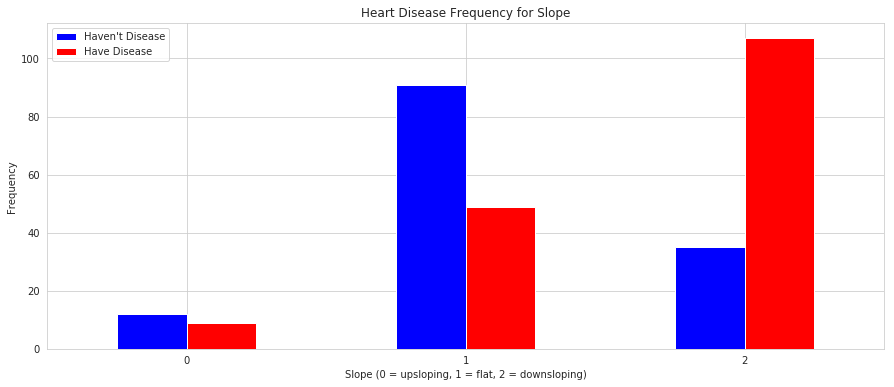

In [5]:
# Slope Parameter

pd.crosstab(heart_df.slope,heart_df.target).plot(kind="bar",figsize=(15,6),color=['b','r' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('Slope (0 = upsloping, 1 = flat, 2 = downsloping)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

#Mapping of the Parameter

heart_df['slope'].loc[heart_df['slope'] == 2] = 2
heart_df['slope'].loc[heart_df['slope'] == 1] = 0
heart_df['slope'].loc[heart_df['slope'] == 0] = 1





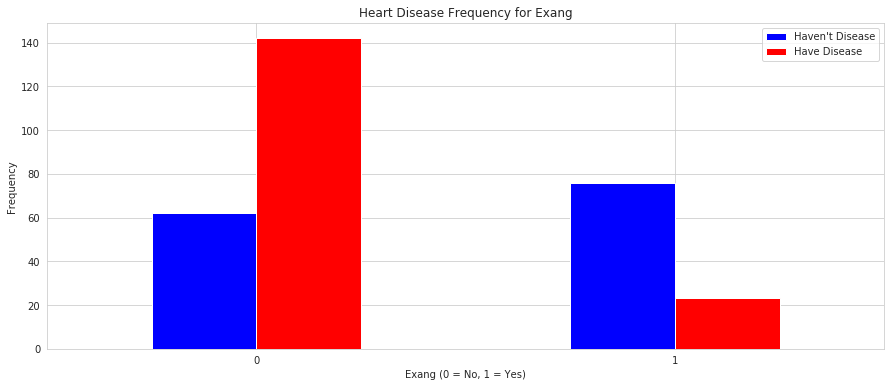

In [6]:
# Exang Parameter

pd.crosstab(heart_df.exang,heart_df.target).plot(kind="bar",figsize=(15,6),color=['b','r' ])
plt.title('Heart Disease Frequency for Exang')
plt.xlabel('Exang (0 = No, 1 = Yes)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()


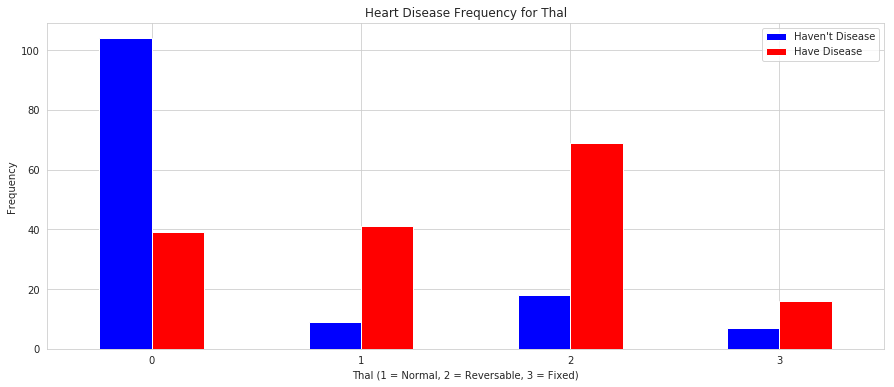

In [7]:
# Cp Parameter

pd.crosstab(heart_df.cp,heart_df.target).plot(kind="bar",figsize=(15,6),color=['b','r'])
plt.title('Heart Disease Frequency for Thal')
plt.xlabel('Thal (1 = Normal, 2 = Reversable, 3 = Fixed)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()


#Mapping of the Parameter

heart_df['cp'].loc[heart_df['cp'] == 3] = 1
heart_df['cp'].loc[heart_df['cp'] == 2] = 2
heart_df['cp'].loc[heart_df['cp'] == 1] = 3
heart_df['cp'].loc[heart_df['cp'] == 0] = 0

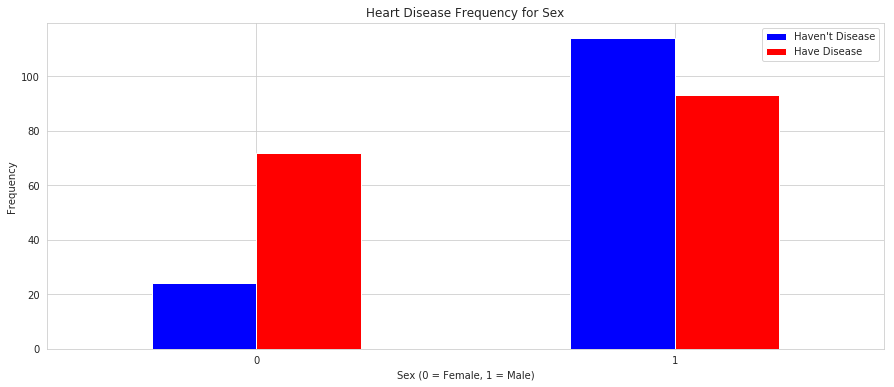

In [8]:
# Sex Parameter

pd.crosstab(heart_df.sex,heart_df.target).plot(kind="bar",figsize=(15,6),color=['b','r' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()



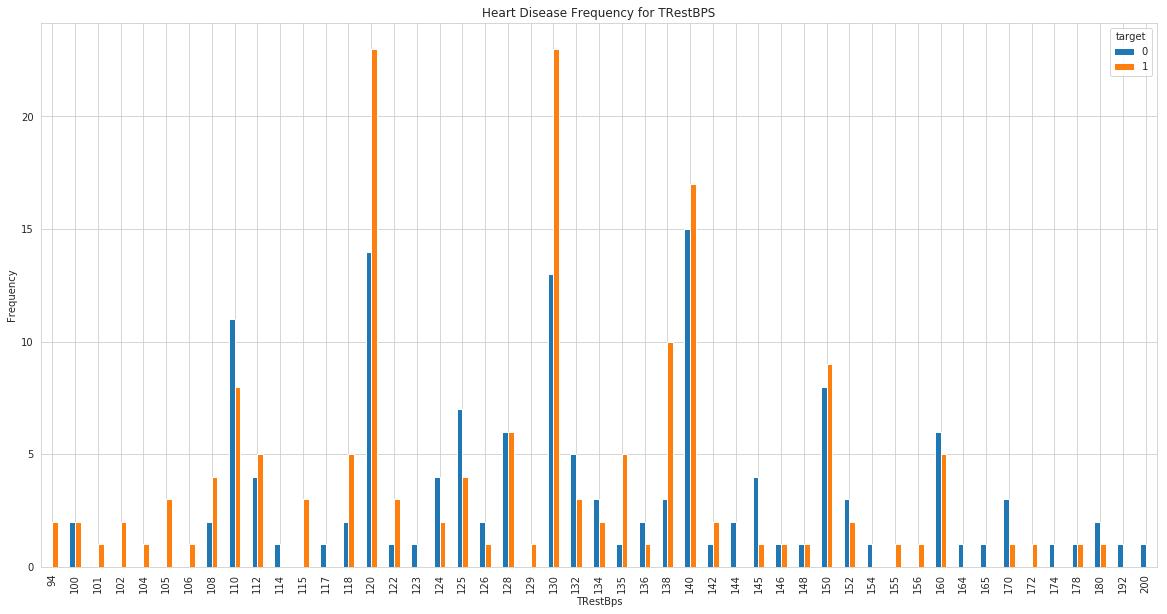

In [9]:
# TRest BPM Parameter

pd.crosstab(heart_df.trestbps,heart_df.target).plot(kind="bar",figsize=(20,10))
plt.title('Heart Disease Frequency for TRestBPS')
plt.xlabel('TRestBps')
plt.ylabel('Frequency')
plt.show()

heart_df['trestbps'].loc[heart_df['trestbps'] > 120] = 2
heart_df['trestbps'].loc[heart_df['trestbps'] < 120] = 0
heart_df['trestbps'].loc[heart_df['trestbps'] == 120] = 1



/home/mcslk/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


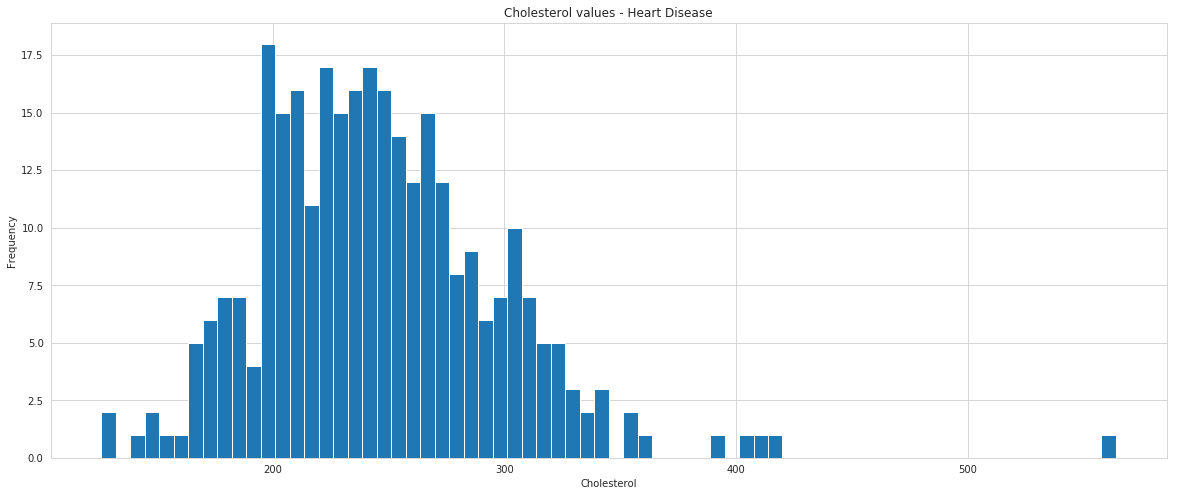

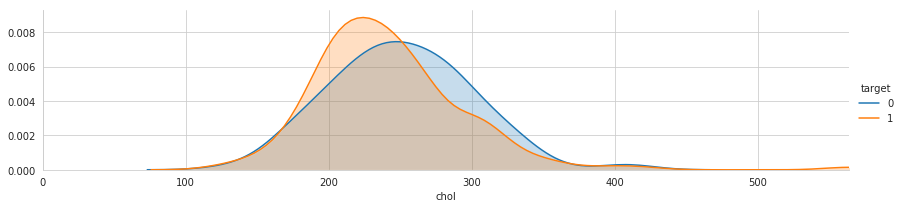

In [10]:
# Cholesterol Parameter

# get average, std
#verage_chol_heart   = heart_df["chol"].mean()
#std_chol_heart       = heart_df["chol"].std()

# plot original Age values
heart_df['chol'].hist(bins=70, figsize=(20,8))
plt.title('Cholesterol values - Heart Disease')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(heart_df, hue="target",aspect=4)
facet.map(sns.kdeplot,'chol',shade= True)
facet.set(xlim=(0, heart_df['chol'].max()))
facet.add_legend()

heart_df['chol'].loc[heart_df['chol'] < 180] = 0
heart_df['chol'].loc[heart_df['chol'] == 230] = 2
heart_df['chol'].loc[heart_df['chol'] > 180] = 1


/home/mcslk/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


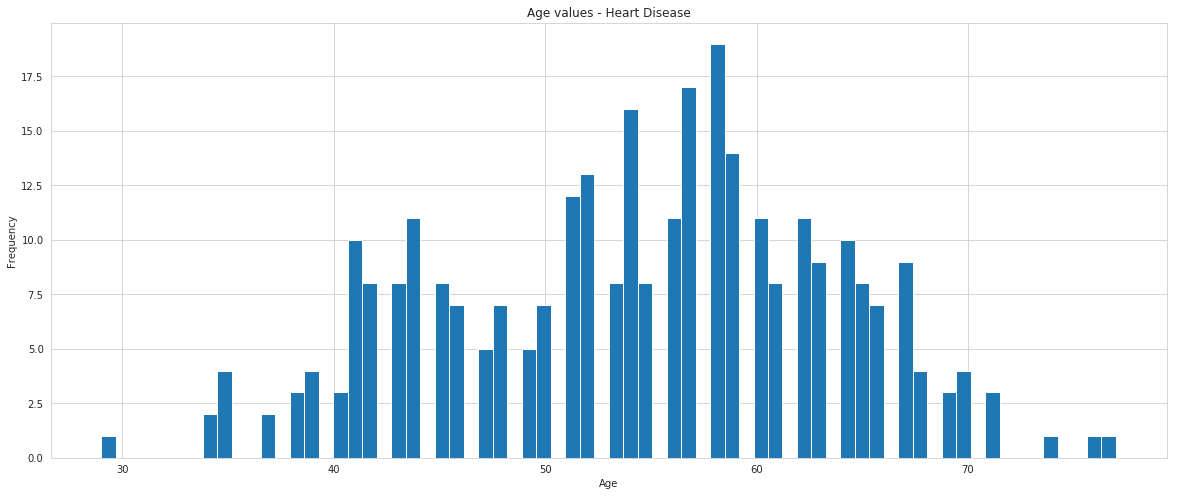

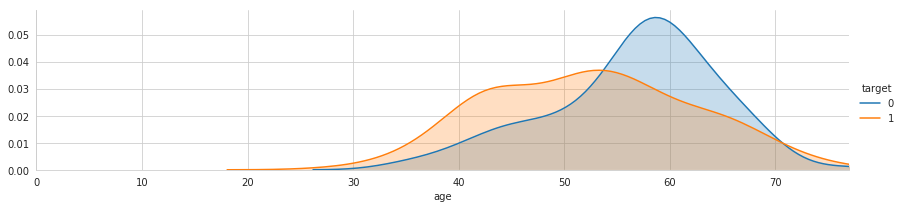

In [11]:
# AGE Parameter

# get average, std
#average_age_heart   = heart_df["age"].mean()
#std_age_heart       = heart_df["age"].std()

# plot original Age values
heart_df['age'].hist(bins=70, figsize=(20,8))
plt.title('Age values - Heart Disease')
plt.xlabel('Age')
plt.ylabel('Frequency')

# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(heart_df, hue="target",aspect=4)
facet.map(sns.kdeplot,'age',shade= True)
facet.set(xlim=(0, heart_df['age'].max()))
facet.add_legend()

#Mapping of the Parameter
heart_df['age'].loc[heart_df['age'] > 54] = 1
heart_df['age'].loc[heart_df['age'] == 54] = 2
heart_df['age'].loc[heart_df['age'] == 53] = 2
heart_df['age'].loc[heart_df['age'] < 53] = 0

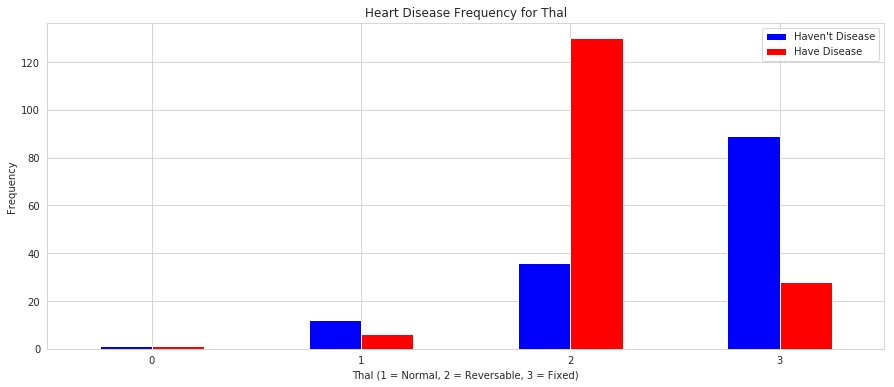

In [12]:
#Thal Parameter

pd.crosstab(heart_df.thal,heart_df.target).plot(kind="bar",figsize=(15,6),color=['b','r'])
plt.title('Heart Disease Frequency for Thal')
plt.xlabel('Thal (1 = Normal, 2 = Reversable, 3 = Fixed)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()


#Mapping of the Parameter
heart_df['thal'].loc[heart_df['thal'] == 3] = 1
heart_df['thal'].loc[heart_df['thal'] == 2] = 3
heart_df['thal'].loc[heart_df['thal'] == 1] = 2
heart_df['thal'].loc[heart_df['thal'] == 0] = 0

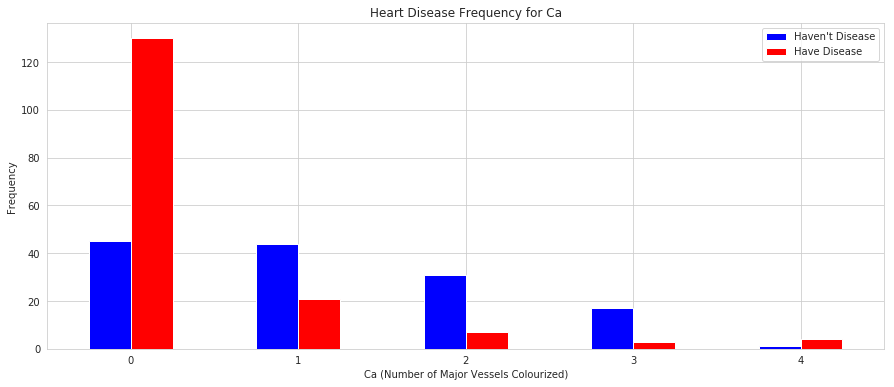

In [13]:
# Cal Parameter

pd.crosstab(heart_df.ca,heart_df.target).plot(kind="bar",figsize=(15,6),color=['b','r'])
plt.title('Heart Disease Frequency for Ca')
plt.xlabel('Ca (Number of Major Vessels Colourized)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()


#Mapping of the Parameter
heart_df['ca'].loc[heart_df['ca'] == 0] = 4
heart_df['ca'].loc[heart_df['ca'] == 1] = 2
heart_df['ca'].loc[heart_df['ca'] == 2] = 1
heart_df['ca'].loc[heart_df['ca'] == 3] = 0
heart_df['ca'].loc[heart_df['ca'] == 4] = 3

/home/mcslk/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


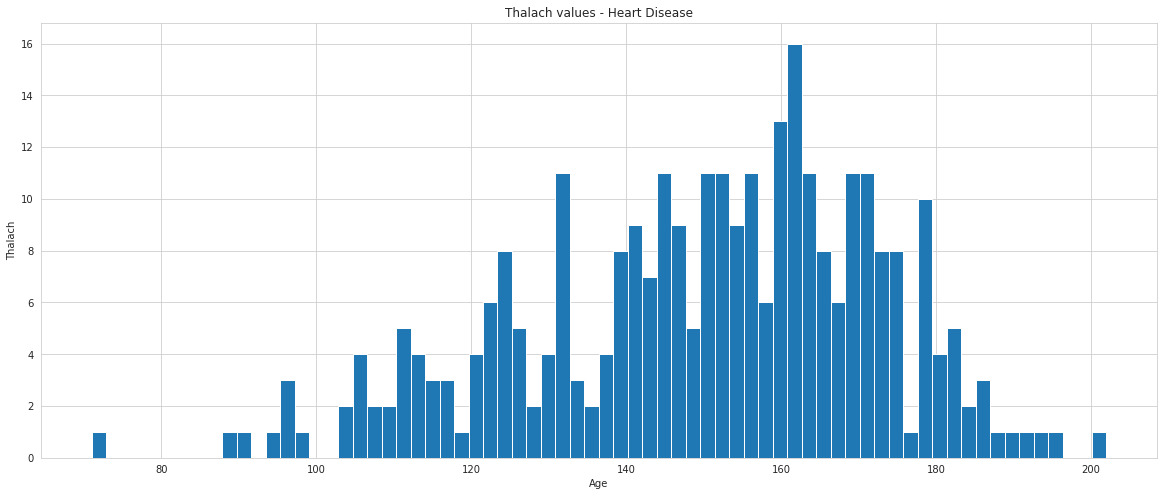

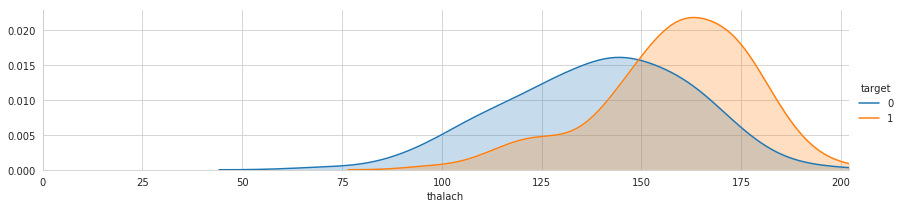

In [14]:
# Thalach

# get average, std
#average_thalach_heart   = heart_df["thalach"].mean()
#std_thalach_heart       = heart_df["thalach"].std()

# plot original Age values
heart_df['thalach'].hist(bins=70, figsize=(20,8))
plt.title('Thalach values - Heart Disease')
plt.xlabel('Age')
plt.ylabel('Thalach')

# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(heart_df, hue="target",aspect=4)
facet.map(sns.kdeplot,'thalach',shade= True)
facet.set(xlim=(0, heart_df['thalach'].max()))
facet.add_legend()

#Mapping of the Parameter
heart_df['thalach'].loc[heart_df['thalach'] > 150] = 1
heart_df['thalach'].loc[heart_df['thalach'] == 150] = 1
heart_df['thalach'].loc[heart_df['thalach'] < 150] = 0


In [15]:
# preview the preprocessed data
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,thalach,exang,slope,ca,thal,target
0,0,1,3,0,1,1,0,0,1,3,2,1
1,0,1,2,0,1,0,0,0,1,3,3,1
2,0,0,3,0,1,0,0,0,2,3,3,1
3,0,1,3,1,1,0,0,0,2,3,3,1
4,0,0,0,1,1,0,0,1,2,3,3,1


In [16]:
# define training and testing sets

X = heart_df.iloc[:, 0: 10].values
Y = heart_df.iloc[:, 11].values



X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.2, random_state = 10)

/home/mcslk/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [18]:
# Random Forest ML Algorithm

prediction_test = RandomForestClassifier(n_estimators = 325, criterion = 'entropy', random_state = 10)
prediction_test.fit(X_train, Y_train)
Y_pred = prediction_test.predict(X_test)
#print(Y_test)
rslt = pd.DataFrame(Y_pred)
rslt.to_csv('wyniki.csv')
train_score = prediction_test.score(X_train, Y_train)
print(train_score)



0.9333333333333333


In [19]:
# Results Validation

trueNegatives, falsePositives, falseNegtives, truePositives = confusion_matrix(Y_test, Y_pred).ravel()
trueNegatives, falsePositives, falseNegtives, truePositives
test_score = prediction_test.score(X_test, Y_test)
print(test_score)

0.8106995884773662


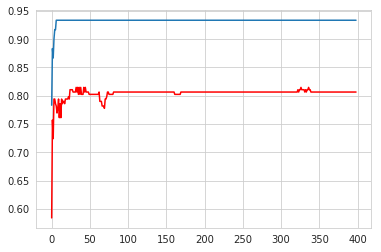

In [20]:
# Tunning of n_estimators parameter

test_scores = []
train_scores = []

for i in range(1,400):
    clf_entro = RandomForestClassifier(n_estimators = i, criterion = 'entropy', random_state = 10)
    clf_entro.fit(X_train, Y_train)
    test_scores.append(clf_entro.score(X_test, Y_test))
    train_scores.append(clf_entro.score(X_train, Y_train))
    

%matplotlib inline
plt.plot(test_scores, color ='red')
plt.plot(train_scores)

[0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1
 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1
 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1
 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 1
 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1
 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1
 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1]


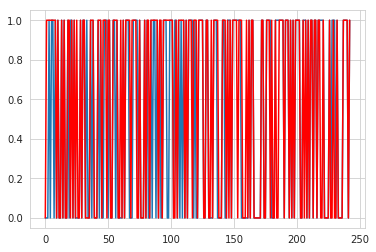

In [22]:
# Results Validation

Y_pred = prediction_test.predict(X_test)
plt.plot(Y_test)
plt.plot(Y_pred, color="red")
print(Y_test)